In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm,tqdm_notebook
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [22]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import warnings
warnings.filterwarnings("ignore")
import math
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
from tqdm import tqdm,tqdm_notebook
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Libs..
import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# DL Libs..

CWD is  /home/ec2-user/IS434/New Run3


In [23]:
df_train = pd.read_csv('train.tsv', '\t')
df_train = df_train.sample(n = 500_000)
df_train_split ,df_test_split = train_test_split(df_train,test_size = 0.25)

In [24]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1100380,1100380,Becca Backlight Primer,1,Beauty/Makeup/Face,Sephora,19.0,0,No description yet
264122,264122,Men's Nike Tank XL,2,Men/Tops/Tank,NaN,10.0,1,No description yet
1204331,1204331,Benefit hoola bronzer,1,Beauty/Makeup/Face,Benefit,19.0,1,"Matte bronzer Full size Brand new, no box No l..."
112801,112801,Glamglow Flashmud 1.7 Oz full size,1,Beauty/Skin Care/Face,NaN,38.0,0,"Fresh, sealed, no box, 100% authentic price is..."
610139,610139,Rig + extra dome + nail,2,Other/Other/Other,NaN,71.0,0,"Mushroom oil rig approximately 4-5"" tall, only..."


# Missing Data

After conducting an EDA on our dataset, we observed that name and category_name has missing data.  
We will feel the missing data with "Missing"

In [25]:
def fill_missing_data(data):
    data.brand_name.fillna(value = "Missing", inplace = True)
    data.category_name.fillna(value = "Missing", inplace = True)

fill_missing_data(df_train_split)
fill_missing_data(df_test_split)

# Remove outliers in Price Column

In [26]:
df_train_split[df_train_split["price"] < 3].count()

train_id             213
name                 213
item_condition_id    213
category_name        213
brand_name           213
price                213
shipping             213
item_description     213
dtype: int64

In [27]:
df_train_split[df_train_split["price"] > 2000].count()

train_id             2
name                 2
item_condition_id    2
category_name        2
brand_name           2
price                2
shipping             2
item_description     2
dtype: int64

In [28]:
df_train_split = df_train_split[(df_train_split.price >= 3)]
df_test_split = df_test_split[(df_test_split.price >= 3)]

Log(Price)

In [29]:
df_train_split['log_price'] = np.log1p(df_train_split['price'])
df_test_split['log_price'] = np.log1p(df_test_split['price'])

# Tokenize

## Category_name column

In [30]:
cat_unique = pd.Series("/".join(df_train_split["category_name"].unique().astype("str")).split("/")).unique()

In [31]:
print(len(cat_unique))

882


In [32]:
CV_category = CountVectorizer(vocabulary = cat_unique ,lowercase = False, binary = True)

In [33]:
CV_category.fit(df_train_split["category_name"])
df_train_transform = CV_category.transform(df_train_split["category_name"])
df_test_transform = CV_category.transform(df_test_split['category_name'])

#creates a matrix in which each unique word is represented by a column of the matrix,
#and each text sample from the document is a row in the matrix. 
#The value of each cell is nothing but the count of the word in that particular text sample. 
print(df_train_transform.shape, df_test_transform.shape)

(374787, 882) (124914, 882)


In [34]:
CV_category.get_feature_names()

['Women',
 'Underwear',
 'Bras',
 'Jeans',
 'Straight Leg',
 'Men',
 'Shorts',
 'Casual Shorts',
 'Electronics',
 'Cell Phones & Accessories',
 'Cell Phones & Smartphones',
 'Tops & Blouses',
 'Blouse',
 'Jewelry',
 'Earrings',
 'Rings',
 'Shoes',
 'Sandals',
 'Sweaters',
 'Crewneck',
 'Boots',
 'Video Games & Consoles',
 'Games',
 'Dresses',
 'Above Knee, Mini',
 'Home',
 'Home Décor',
 'Candles & Holders',
 'Beauty',
 'Makeup',
 'Lips',
 'Handmade',
 'Children',
 'Toy',
 'Other',
 'Daily & Travel items',
 'Personal Care',
 "Women's Accessories",
 'Scarves & Wraps',
 'Athletic Apparel',
 'Pants, Tights, Leggings',
 'Scoop Neck',
 'Kids',
 'Boys 0-24 Mos',
 'Swimwear',
 'Hooded',
 'Loafers & Slip-Ons',
 "Women's Handbags",
 'Shoulder Bag',
 'T-Shirts',
 'Skin Care',
 'Body',
 'Tools & Accessories',
 'Makeup Brushes & Tools',
 'Totes & Shoppers',
 'Tapestries',
 'TV, Audio & Surveillance',
 'Portable Audio & Accessories',
 'Bath & Body',
 'Cleansers',
 'Flats',
 'Slim, Skinny',
 'Tops',

In [35]:
df_train_transform.toarray()

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [36]:
CV_category.vocabulary_

{'Women': 0,
 'Underwear': 1,
 'Bras': 2,
 'Jeans': 3,
 'Straight Leg': 4,
 'Men': 5,
 'Shorts': 6,
 'Casual Shorts': 7,
 'Electronics': 8,
 'Cell Phones & Accessories': 9,
 'Cell Phones & Smartphones': 10,
 'Tops & Blouses': 11,
 'Blouse': 12,
 'Jewelry': 13,
 'Earrings': 14,
 'Rings': 15,
 'Shoes': 16,
 'Sandals': 17,
 'Sweaters': 18,
 'Crewneck': 19,
 'Boots': 20,
 'Video Games & Consoles': 21,
 'Games': 22,
 'Dresses': 23,
 'Above Knee, Mini': 24,
 'Home': 25,
 'Home Décor': 26,
 'Candles & Holders': 27,
 'Beauty': 28,
 'Makeup': 29,
 'Lips': 30,
 'Handmade': 31,
 'Children': 32,
 'Toy': 33,
 'Other': 34,
 'Daily & Travel items': 35,
 'Personal Care': 36,
 "Women's Accessories": 37,
 'Scarves & Wraps': 38,
 'Athletic Apparel': 39,
 'Pants, Tights, Leggings': 40,
 'Scoop Neck': 41,
 'Kids': 42,
 'Boys 0-24 Mos': 43,
 'Swimwear': 44,
 'Hooded': 45,
 'Loafers & Slip-Ons': 46,
 "Women's Handbags": 47,
 'Shoulder Bag': 48,
 'T-Shirts': 49,
 'Skin Care': 50,
 'Body': 51,
 'Tools & Access

Truncated SVD for feature importance

What is SVD?
SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

It helps with dimensionality reduction.



In [37]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=1)
svd.fit(df_train_transform)

TruncatedSVD(n_components=100, n_iter=1)

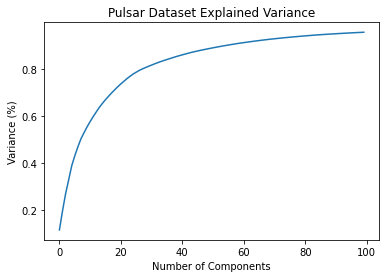

In [38]:
plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

with K = 80, we get an explained variance above 90%(?).Hence, 80 features or words explain 90% of our data.

We can just use these top components as our features.

## Name column

In [39]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['name'].values) 


# train_name = vectorizer.transform(df_train_split['name'].values)
# test_name = vectorizer.transform(df_test_split['name'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [40]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
stop_words = stopwords.words('english')

def preprocess(sentence):
    sentence=str(sentence)
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)

df_train_split['name_process']=df_train_split['name'].map(lambda s:preprocess(s))
df_test_split['name_process']=df_test_split['name'].map(lambda s:preprocess(s))


In [41]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train_split['name_process'].values) 


train_name = vectorizer.transform(df_train_split['name_process'].values)
test_name = vectorizer.transform(df_test_split['name_process'].values)

print("After vectorizations")
print(train_name.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(374787, 7013)
['aaron', 'abalon', 'abbi', 'abc', 'abercrombi', 'abh', 'about', 'absolu', 'absolut', 'abstract', 'acacia', 'academi', 'acc', 'accent', 'access', 'accessori', 'accu', 'ace', 'acer', 'acg', 'acid', 'acn', 'acoust', 'acqua', 'acryl', 'act', 'action', 'activ', 'actual', 'acuvu', 'adam', 'adapt', 'adaptor', 'add', 'addi', 'addict', 'addida', 'addit', 'address', 'adelin', 'aden', 'adhes', 'adi', 'adida', 'adjust', 'ador', 'adrianna', 'adrienn', 'adult', 'adv', 'advanc', 'advantag', 'adventur', 'advisori', 'advocar', 'aeo', 'aeri', 'aero', 'aeropostal', 'aerosol', 'aesthet', 'affair', 'afflict', 'african', 'after', 'afterglow', 'agaci', 'again', 'against', 'agat', 'agav', 'agd', 'age', 'ageless', 'agenda', 'agent', 'agn', 'ahhh', 'ahhhsugarsugar', 'aid', 'aiko', 'aio', 'air', 'airbrush', 'airmax', 'airplan', 'airpod', 'airsoft', 'airspun', 'airwalk', 'airwick', 'akira', 'alabama', 'aladdin', 'alarm', 'album', 'alcatel', 'alchemist', 'aldo', 'ale', 'alegria

# Item Description

In [42]:
# function to decontract phrases
#https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def text_process(text):
    stop_words = stopwords.words('english')
    processed = []
    desc_length_tokenized = []
    for sentence in tqdm_notebook(text):
        sentence_decontracted = decontracted(sentence)
        sentence_decontracted = sentence_decontracted.replace('\\"', ' ')
        sentence_decontracted = sentence_decontracted.replace('\\`', ' ')
        sentence_decontracted = re.sub(r"[^0-9a-zA-Z]+", ' ', sentence_decontracted)
        text_tokens = word_tokenize(sentence_decontracted)
        desc_length_tokenized.append(len(text_tokens))
        joined_words = " ".join(word for word in text_tokens if word not in stop_words)
        processed.append(joined_words)
    return processed, desc_length_tokenized

In [43]:
df_train_split['item_description'] = df_train_split['item_description'].replace([np.nan],"No Description")
df_test_split['item_description'] = df_test_split['item_description'].replace([np.nan],"No Description")

In [44]:
df_train_split['item_desc_processed'], df_train_split['item_desc_length_tokenized'] = text_process(df_train_split['item_description'])
df_test_split['item_desc_processed'], df_test_split['item_desc_length_tokenized'] = text_process(df_test_split['item_description'])

In [45]:
df_train_split['item_desc_processed_2']=df_train_split['item_description'].map(lambda s:preprocess(s))
df_test_split['item_desc_processed_2']=df_test_split['item_description'].map(lambda s:preprocess(s))

In [46]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['item_desc_processed_2'].values) 


# train_name = vectorizer.transform(df_train_split['item_desc_processed_2'].values)
# test_name = vectorizer.transform(df_test_split['item_desc_processed_2'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [47]:
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result

tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_df = 0.5, max_features=5000, use_idf=True) 
tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed_2'])
tfidf_vectorizer_vectors_test = tfidf_vectorizer.transform(df_test_split['item_desc_processed_2'])


In [48]:
print(tfidf_vectorizer_vectors_train.shape)
print(tfidf_vectorizer_vectors_test.shape)

(374787, 5000)
(124914, 5000)


In [49]:
print(tfidf_vectorizer.get_feature_names())

['abercrombi', 'abercrombi fitch', 'abh', 'abl', 'about', 'absolut', 'absorb', 'accent', 'accept', 'accept offer', 'access', 'accessori', 'accident', 'accord', 'accordingli', 'account', 'accur', 'achiev', 'acid', 'acn', 'across', 'acryl', 'action', 'activ', 'activ charcoal', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addit item', 'address', 'adhes', 'adhes seal', 'adida', 'adjust', 'adjust shoulder', 'adjust strap', 'ador', 'adult', 'advanc', 'adventur', 'aeropostal', 'affect', 'afford', 'african', 'after', 'after purchas', 'age', 'ago', 'agre', 'air', 'air dri', 'air ipad', 'air jordan', 'air max', 'alarm', 'album', 'alcohol', 'alex', 'alex ani', 'all', 'all brand', 'all brand new', 'all good', 'all good condit', 'all great', 'all item', 'all item come', 'all item ship', 'all new', 'all order', 'all order ship', 'all price', 'all product', 'all sale', 'all sale final', 'all size', 'allergi', 'allow', 'alloy', 'almond', 'almost', 'almost new', 'alo', 'aloha', 'alon', 'along', 

## Sentiment of item description

In [50]:
def generate_sentiment_scores(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in tqdm_notebook(sentences): 
        sentence_sentiment_score = analyzer.polarity_scores(sentence)
        results.append(sentence_sentiment_score)
    return results

In [51]:
train_senti_desc = generate_sentiment_scores(df_train_split['item_description'])
test_senti_desc = generate_sentiment_scores(df_test_split['item_description'])

In [52]:
def get_sentiments(dataframe, array):
    negative, neutral, compound, positive = [], [], [], []
    for sentiment_dict in array:
        for sentiment, score in sentiment_dict.items():
            if(sentiment=='neg'):
                negative.append(score)
            elif(sentiment=='neu'):
                neutral.append(score)
            elif(sentiment=='compound'):
                compound.append(score)
            elif(sentiment=='pos'):
                positive.append(score)
    dataframe['negative'] = negative
    dataframe['positive'] = positive
    dataframe['neutral'] = neutral
    dataframe['compound'] = compound

In [53]:
get_sentiments(df_train_split,train_senti_desc)
get_sentiments(df_test_split,test_senti_desc)

In [54]:
def get_description_features(dataframe, sentence_df):
    percentage_of_exclamation_marks, percentage_of_star, percentage_of_ampersand, percentage_of_hashtag = [], [], [], []
    for description in sentence_df:
        hashtag_regex = re.compile(r'(#[a-z]{2,})')
        percentage_of_exclamation_marks.append(description.count('!')/len(description) * 100)
        percentage_of_star.append(description.count("*")/len(description)*100)
        percentage_of_ampersand.append(description.count("%")/len(description)*100)
        percentage_of_hashtag.append(len(hashtag_regex.findall(description))/len(description)*100)
    dataframe['percentage_of_exclamation_marks'] = percentage_of_exclamation_marks
    dataframe['percentage_of_star'] = percentage_of_star
    dataframe['percentage_of_ampersand'] = percentage_of_ampersand
    dataframe['percentage_of_hashtag'] = percentage_of_hashtag

In [55]:
get_description_features(df_train_split,df_train_split['item_description'])
get_description_features(df_test_split,df_test_split['item_description'])

Vectorize item description

In [56]:
# tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_features=5000, use_idf=True) 
# tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed'])
# tfidf_vectorizer_vectors_test =tfidf_vectorizer.transform(df_test_split['item_desc_processed'])

In [57]:
new = pd.DataFrame.sparse.from_spmatrix(data = tfidf_vectorizer_vectors_train, columns= tfidf_vectorizer.get_feature_names())

In [58]:
new

,abercrombi,abercrombi fitch,abh,abl,about,absolut,absorb,accent,accept,accept offer,...,zip,zip closur,zip hoodi,zip pocket,zipper,zipper back,zipper closur,zipper pocket,zirconia,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
374783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
374784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
374785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


# Cat Brand Shipping

In [59]:
def generate_cbs_stats(train_data, test_data_to_transform):
    df_group_cat_brand_shipping = train_data.groupby('cat_brand_ship',as_index = False).agg({"shipping" : len,
                                                        "log_price" : [np.median, np.mean, np.std,np.min,np.max]})
    df_group_cat_brand_shipping.columns = ['cat_brand_ship','cat_brand_shipping_count','cat_brand_shipping_log_price_median','cat_brand_shipping_log_price_mean','cat_brand_shipping_log_price_std',
                    'cat_brand_shipping_log_price_min','cat_brand_shipping_log_price_max']

    df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'].fillna(0)
    df_group_cat_brand_shipping['cat_brand_shipping_log_price_conf_variance'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] / df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean']
    df_group_cat_brand_shipping['cat_brand_shipping_log_count'] = np.log1p(df_group_cat_brand_shipping['cat_brand_shipping_count'])
    df_group_cat_brand_shipping['cat_brand_shipping_min_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] - (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2)).clip(lower=1.0)
    df_group_cat_brand_shipping['cat_brand_shipping_max_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] + (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2))
    
    df_group_stats_train = train_data.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    df_group_stats_test = test_data_to_transform.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    scaler = StandardScaler(copy=True)
    cat_brand_shipping_feats_scaled_train = scaler.fit_transform(df_group_stats_train)
    cat_brand_shipping_fit = scaler.fit(df_group_stats_train)
    #fit with training, then transform test data using train data mean and SD
    cat_brand_shipping_feats_scaled_test = scaler.transform(df_group_stats_test)

    return cat_brand_shipping_feats_scaled_train, cat_brand_shipping_feats_scaled_test

In [60]:
df_train_split['cat_brand_ship'] = (df_train_split['category_name'].astype(str) + "_" + 
                                    df_train_split['brand_name'].astype(str) + "_" +  
                                    df_train_split['shipping'].astype(str))

df_test_split['cat_brand_ship'] = (df_test_split['category_name'].astype(str) + "_" + 
                                    df_test_split['brand_name'].astype(str) + "_" +  
                                    df_test_split['shipping'].astype(str))

In [61]:
train_cbs_feats, test_cbs_feats = generate_cbs_stats(df_train_split,df_test_split)

In [62]:
train_cbs_feats.shape
test_cbs_feats.shape

(124914, 7)

In [63]:
stats_train = pd.DataFrame(train_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

stats_test = pd.DataFrame(test_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

#  Item condition + Shipping Dummies

In [64]:
#itemcondition and shipping, create dummy variables
item_shipping_dummies_train = scipy.sparse.csr_matrix(pd.get_dummies(df_train_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)
item_shipping_dummies_test = scipy.sparse.csr_matrix(pd.get_dummies(df_test_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)

# Brand Name

In [65]:
df_train_split['brand_name'] = df_train_split['brand_name'].replace([np.nan],"No Brand Name")
df_test_split['brand_name'] = df_test_split['brand_name'].replace([np.nan],"No Brand Name")

In [66]:
#Label Binarizer 
# It assigns a unique value or number to each label in a categorical feature.
# It encodes categorical integer features as a one-hot numeric array. 
#It makes model training easier and faster.
#it encodes the data into dummy variables 
#indicating the presence of a particular label or not
lb = LabelBinarizer(sparse_output=True)
fitting_brand_name = lb.fit(df_train_split['brand_name'])
X_brand_train = lb.transform(df_train_split['brand_name'])
X_brand_test = lb.transform(df_test_split['brand_name'])

In [67]:
X_brand_test.shape

(124914, 3211)

In [68]:
print(df_train_split['brand_name'][:10])

1347520          Missing
1346389          Miss Me
1407729          Missing
674858             Apple
879972      BCBGMAXAZRIA
1463072        Hot Topic
391879           Missing
512478          SKECHERS
62321               PINK
651706     UGG Australia
Name: brand_name, dtype: object


In [69]:
print(X_brand_train[:10])

  (0, 1932)	1
  (1, 1930)	1
  (2, 1932)	1
  (3, 175)	1
  (4, 252)	1
  (5, 1294)	1
  (6, 1932)	1
  (7, 2499)	1
  (8, 2164)	1
  (9, 2945)	1


In [70]:
df_corr = pd.concat([pd.DataFrame(df_train_split,
                                  columns = ['item_desc_length_tokenized','negative', 'neutral', 'compound', 'positive','percentage_of_exclamation_marks', 'percentage_of_star', 'percentage_of_ampersand', 'percentage_of_hashtag']),
                    pd.DataFrame(train_cbs_feats,
                                  columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max']),
                    df_train_split['log_price'].reset_index(drop = True)],axis = 1)

In [71]:
#df_corr = pd.concat([df_train_split['log_price'].reset_index(drop = True)],axis = 1)

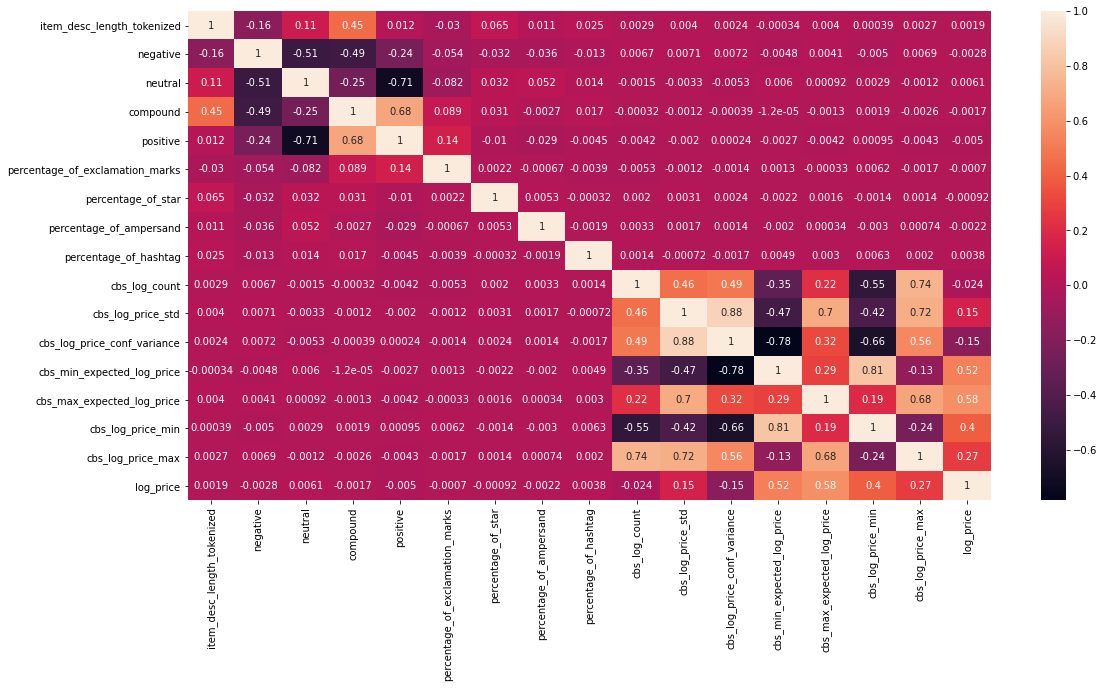

In [72]:
corrMatrix  = df_corr.corr()

plt.figure(figsize = (18,9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Percentage of hashtag, Percentage of ampersand, Percentage of star, Percentage of exclamation marks
has a low correlation with log price and thus we are dropping.



# X_train and X_test

In [73]:
X_train = scipy.sparse.hstack((X_brand_train,
                               df_train_transform,
                               tfidf_vectorizer_vectors_train,
                               item_shipping_dummies_train,
                               train_name,
                               np.array(df_train_split['negative'])[:,None],
                               np.array(df_train_split['neutral'])[:,None],
                               np.array(df_train_split['compound'])[:,None],
                               np.array(df_train_split['positive'])[:,None]
                              )).tocsr().astype('float32')

X_test = scipy.sparse.hstack((X_brand_test,
                              df_test_transform,
                              tfidf_vectorizer_vectors_test,
                              item_shipping_dummies_test,
                              test_name,
                              np.array(df_test_split['negative'])[:,None],
                              np.array(df_test_split['neutral'])[:,None],
                              np.array(df_test_split['compound'])[:,None],
                              np.array(df_test_split['positive'])[:,None]
                              )).tocsr().astype('float32')

y_train = df_train_split['log_price']
y_test = df_test_split['log_price']

print("X_train Shape is ",X_train.shape)
print("X_test Shape is ",X_test.shape)
print("y_train Shape is ",y_train.shape)
print("y_test Shape is ",y_test.shape)

X_train Shape is  (374787, 16112)
X_test Shape is  (124914, 16112)
y_train Shape is  (374787,)
y_test Shape is  (124914,)


In [74]:
print(train_cbs_feats.shape, test_cbs_feats.shape)
print(X_brand_train.shape, X_brand_test.shape)
print(df_train_transform.shape, df_test_transform.shape)
print(tfidf_vectorizer_vectors_train.shape, tfidf_vectorizer_vectors_test.shape)
print(train_name.shape, test_name.shape)

(374787, 7) (124914, 7)
(374787, 3211) (124914, 3211)
(374787, 882) (124914, 882)
(374787, 5000) (124914, 5000)
(374787, 7013) (124914, 7013)


In [75]:
from scipy import sparse
import pandas as pd
# Uncomment out to save for the first time. Subsequent times only need to load
# sparse.save_npz("X_train3.npz", X_train)
# sparse.save_npz("X_test3.npz", X_test)
# y_train.to_pickle("y_train3")
# y_test.to_pickle("y_test3")


#Keep uncommented to load. 
X_train = sparse.load_npz("X_train3.npz")
X_test = sparse.load_npz("X_test3.npz")

y_train = pd.read_pickle("y_train3")
y_test = pd.read_pickle("y_test3")

# LightGBM with Tuning

In [76]:
from lightgbm import LGBMRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [77]:
#below are using the default/typical values 
lgbm_params ={
            'learning_rate': 0.1,
            'n_estimators': 100,
            'num_leaves': 31,
            'max_depth' : 7,
            'boosting_type' : ['gbdt'],
            'min_child_samples': 20, 
            'objective': 'regression'
}

In [78]:
lgbm_model = LGBMRegressor(**lgbm_params)
lgbm_model.fit(X_train, y_train, early_stopping_rounds=None,verbose=True)

lgbm_pred_train = lgbm_model.predict(X_train)
lgbm_pred_test  = lgbm_model.predict(X_test)

print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lgbm_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lgbm_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lgbm_pred_train)))
print('Train R^2:',r2_score(y_train, lgbm_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lgbm_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lgbm_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred_test)))
print('Test R^2:',r2_score(y_test, lgbm_pred_test))

Train Mean Absolute Error: 0.43610506799031207
Train Mean Squared Error: 0.3200882754423142
Train Root Mean Squared Error: 0.5657634447737978
Train R^2: 0.4238476629067095
------------------------------
Test Mean Absolute Error: 0.4374284887992286
Test Mean Squared Error: 0.3244941576346938
Test Root Mean Squared Error: 0.5696438866824551
Test R^2: 0.4164224701253142


In [59]:
adjParams = {
    'learning_rate': [ 0.1,0.2,0.3],
    'n_estimators': [200,300,400],
    'num_leaves': [60,80,100,120,140],
    'max_depth' : [40,60,80,100],
    'boosting_type' : ['gbdt']  
            }

lgbm_params ={
    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    'min_child_samples': 20, 
    'objective': 'regression'
             }


In [60]:
lgbm_model = LGBMRegressor(**lgbm_params)
# Create the grid
grid = GridSearchCV(lgbm_model, adjParams, verbose=1, cv=3, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train,
         early_stopping_rounds=None,
         verbose=True)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 82.2min finished


GridSearchCV(cv=3,
             estimator=LGBMRegressor(colsample_bytree=0.8,
                                     objective='regression', subsample=0.9),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [40, 60, 80, 100],
                         'n_estimators': [200, 300, 400],
                         'num_leaves': [60, 80, 100, 120, 140]},
             verbose=1)

In [61]:
print('Best parameters found for LightGBM by grid search are:', grid.best_params_)

Best parameters found for LightGBM by grid search are: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 80, 'n_estimators': 400, 'num_leaves': 140}


In [79]:
lgbm_tuned_params ={
    'learning_rate': 0.1,
    'n_estimators': 400,
    'num_leaves': 140,
    'max_depth' : 80,
    'boosting_type' : 'gbdt',
    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    'min_child_samples': 20, 
    'objective': 'regression'
             }

lgbm_tune_model = LGBMRegressor(**lgbm_tuned_params)
lgbm_tune_model.fit(X_train, y_train,early_stopping_rounds=None,verbose=True)

LGBMRegressor(colsample_bytree=0.8, max_depth=80, n_estimators=400,
              num_leaves=140, objective='regression', subsample=0.9)

In [80]:
lgbm_pred_train_tuned = lgbm_tune_model.predict(X_train)
lgbm_pred_test_tuned  = lgbm_tune_model.predict(X_test)

In [81]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lgbm_pred_train_tuned))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lgbm_pred_train_tuned))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lgbm_pred_train_tuned)))
print('Train R^2:',r2_score(y_train, lgbm_pred_train_tuned))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lgbm_pred_test_tuned))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lgbm_pred_test_tuned))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred_test_tuned)))
print('Test R^2:',r2_score(y_test, lgbm_pred_test_tuned))

Train Mean Absolute Error: 0.32034964833132523
Train Mean Squared Error: 0.1779488008685078
Train Root Mean Squared Error: 0.4218397810407499
Train R^2: 0.6796958046599356
------------------------------
Test Mean Absolute Error: 0.3551797410981256
Test Mean Squared Error: 0.22301175924955247
Test Root Mean Squared Error: 0.47224120875835524
Test R^2: 0.5989306786152524


# Ridge Regression 

In [82]:
from sklearn.linear_model import Ridge

In [83]:
ridge_model = Ridge(solver="sag", fit_intercept=True, random_state=150)
ridge_model.fit(X_train, y_train) 
ridge_model_pred_train = ridge_model.predict(X_train)
ridge_model_pred_test = ridge_model.predict(X_test)

In [84]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, ridge_model_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, ridge_model_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ridge_model_pred_train)))
print('Train R^2:',r2_score(y_train, ridge_model_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_model_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_model_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_model_pred_test)))
print('Test R^2:',r2_score(y_test, ridge_model_pred_test))

Train Mean Absolute Error: 0.3617029705413125
Train Mean Squared Error: 0.2277455999049264
Train Root Mean Squared Error: 0.477226989916671
Train R^2: 0.5900625867454354
------------------------------
Test Mean Absolute Error: 0.37686200598734054
Test Mean Squared Error: 0.2480206535408013
Test Root Mean Squared Error: 0.49801672014180537
Test R^2: 0.5539541253800033


In [160]:
ridge_model = Ridge()
params_Ridge = {'alpha': [50,20,10,6,2,1,0.1,0.01], 
                "fit_intercept": [True, False], 
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }
Ridge_GS = GridSearchCV(ridge_model, param_grid=params_Ridge, verbose=1, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.5min finished


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [50, 20, 10, 6, 2, 1, 0.1, 0.01],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             verbose=1)

In [161]:
print('Best parameters found for Ridge Regression by Grid Search are:', Ridge_GS.best_params_)

Best parameters found for Ridge Regression by Grid Search are: {'alpha': 6, 'fit_intercept': True, 'solver': 'sag'}


In [85]:
ridge_model_tuned = Ridge(alpha=6,solver="sag", fit_intercept=True)
ridge_model_tuned.fit(X_train, y_train) 
ridge_model_tuned_pred_train = ridge_model_tuned.predict(X_train)
ridge_model_tuned_pred_test = ridge_model_tuned.predict(X_test)

In [86]:
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, ridge_model_tuned_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ridge_model_tuned_pred_train)))
print('Train R^2:',r2_score(y_train, ridge_model_tuned_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_model_tuned_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_model_tuned_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_model_tuned_pred_test)))
print('Test R^2:',r2_score(y_test, ridge_model_tuned_pred_test))

Train Mean Squared Error: 0.2309791743463687
Train Root Mean Squared Error: 0.48060292794194326
Train R^2: 0.5842422190077304
------------------------------
Test Mean Absolute Error: 0.37638792394039533
Test Mean Squared Error: 0.2472309379522852
Test Root Mean Squared Error: 0.49722322748669456
Test R^2: 0.5553743675064227


# Ensemble

In [87]:
from sklearn.ensemble import VotingRegressor
voting_ensemble = VotingRegressor([('lightgbm', lgbm_tune_model), ('ridge', ridge_model_tuned)])
voting_ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(colsample_bytree=0.8, max_depth=80,
                                           n_estimators=400, num_leaves=140,
                                           objective='regression',
                                           subsample=0.9)),
                            ('ridge', Ridge(alpha=6, solver='sag'))])

In [88]:
ensemble_train = voting_ensemble.predict(X_train)
ensemble_test = voting_ensemble.predict(X_test)

In [89]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, ensemble_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, ensemble_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ensemble_train)))
print('Train R^2:',r2_score(y_train, ensemble_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, ensemble_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, ensemble_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ensemble_test)))
print('Test R^2:',r2_score(y_test, ensemble_test))

Train Mean Absolute Error: 0.3346868078605461
Train Mean Squared Error: 0.19421605625081753
Train Root Mean Squared Error: 0.44069950788583545
Train R^2: 0.6504150782926237
------------------------------
Test Mean Absolute Error: 0.357618731272576
Test Mean Squared Error: 0.22467783345828166
Test Root Mean Squared Error: 0.47400193402377766
Test R^2: 0.5959343736019194


# Exporting Model

In [91]:
X_brand_train_columns = ["brand_name " + x for x in lb.classes_]
cat_name_train_columns = ["cat_name " + x for x in CV_category.get_feature_names()]
tfidf_vectorizer_vectors_train_columns = ["item_desc " + x for x in tfidf_vectorizer.get_feature_names()]
item_shipping_dummies_train_columns = ['item_condition_id', 'shipping']
train_name_columns = ["item_name " + x for x in vectorizer.get_feature_names()]
sentiment_columns = ['negative','neutral','compound','positive']
all_columns = X_brand_train_columns + cat_name_train_columns + tfidf_vectorizer_vectors_train_columns + item_shipping_dummies_train_columns + train_name_columns + sentiment_columns

In [93]:
import joblib
import pickle

filename = 'finalized_model.sav'
joblib.dump(voting_ensemble, filename)

with open('CV_category.pkl', 'wb') as f:
    pickle.dump(CV_category, f)

with open('name_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open('brand_name_vectorizer.pkl', 'wb') as f:
    pickle.dump(lb, f)
    
with open('all_columns.pkl', 'wb') as f:
    pickle.dump(all_columns, f)
    
with open('df_train_split.pkl', 'wb') as f:
    pickle.dump(df_train_split, f)
with open('df_test_split.pkl', 'wb') as f:
    pickle.dump(df_test_split, f)